<a href="https://colab.research.google.com/github/m-adil172000/Omdena_MindGuardian/blob/main/EDA_on_mental_health_counseling_conversation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [1]:
#importing all the required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


import json
from collections import Counter

from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud
import gensim
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from transformers import pipeline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# loading and clean the JSON data
with open('mental_health_counseling_conversations (1).json', 'r') as f:
    # Reading the file content
    file_content = f.read()
    # Trying to fix potential issues by removing trailing characters
    cleaned_content = file_content.rstrip()

    try:
        data = pd.read_json(json.loads(cleaned_content))
        print(data.head())
    except ValueError as e:
        print(f"Error loading JSON: {e}")

Error loading JSON: Extra data: line 2 column 1 (char 1335)


In [3]:
data = []
with open('mental_health_counseling_conversations (1).json', 'r') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except:
            pass
df = pd.DataFrame(data)

In [4]:
df.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
2,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
3,I'm going through some things with my feelings...,I first want to let you know that you are not ...
4,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'..."


In [5]:
df.shape

(3511, 2)

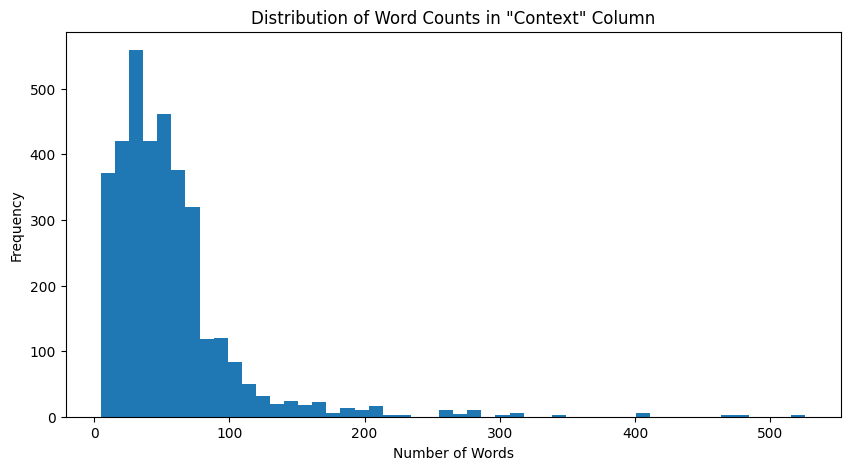

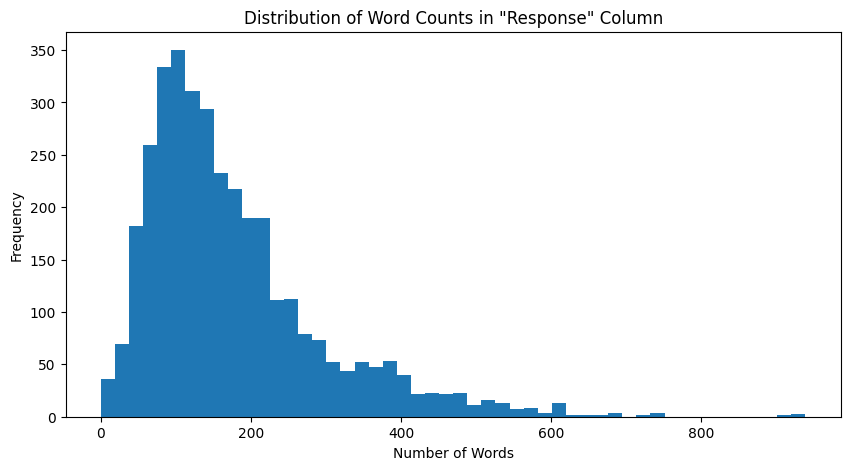

In [6]:

# Calculate the number of words in each 'Context' data point
df['Context_word_count'] = df['Context'].apply(lambda x: len(str(x).split()))

# Plot the histogram for 'Context' word counts
plt.figure(figsize=(10, 5))
plt.hist(df['Context_word_count'], bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in "Context" Column')
plt.show()

# Calculate the number of words in each 'Response' data point
df['Response_word_count'] = df['Response'].apply(lambda x: len(str(x).split()))

# Plot the histogram for 'Response' word counts
plt.figure(figsize=(10, 5))
plt.hist(df['Response_word_count'], bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in "Response" Column')
plt.show()

In [7]:
df.head()

,Context,Response,Context_word_count,Response_word_count
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",60,163
1,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,60,60
2,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,60,137
3,I'm going through some things with my feelings...,I first want to let you know that you are not ...,60,63
4,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'...",60,55


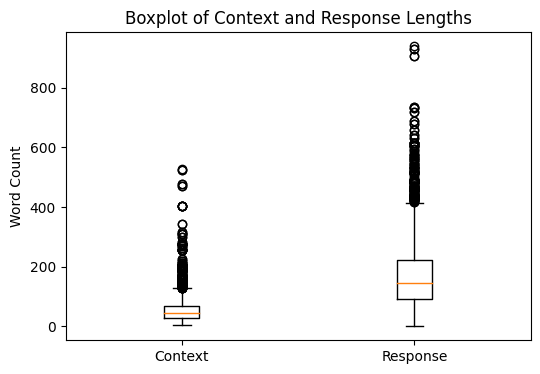

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot([df['Context_word_count'], df['Response_word_count']], labels=['Context', 'Response'])
plt.ylabel('Word Count')
_ = plt.title('Boxplot of Context and Response Lengths')

In [9]:
df_text = df[['Context','Response']]

#### Topic Modeling using LDA (Latent Dirichlet Allocation)

In [10]:
def preprocess_text(df):
  corpus = []
  stem = PorterStemmer()
  lem = WordNetLemmatizer()
  for query in df['Context']:
    words = [w for w in word_tokenize(query) if (w not in stopwords.words('english'))]
    words = [lem.lemmatize(w) for w in words if len(w)>2]
    corpus.append(words)
  return corpus

corpus = preprocess_text(df)

In [11]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]


In [12]:
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=7, id2word=dic)
lda_model.show_topics()


[(0,
  '0.021*"year" + 0.016*"n\'t" + 0.011*"feel" + 0.011*"get" + 0.010*"time" + 0.009*"friend" + 0.009*"want" + 0.008*"back" + 0.008*"love" + 0.008*"together"'),
 (1,
  '0.028*"feel" + 0.021*"n\'t" + 0.018*"like" + 0.017*"want" + 0.016*"relationship" + 0.013*"get" + 0.013*"think" + 0.012*"time" + 0.012*"How" + 0.009*"know"'),
 (2,
  '0.022*"counseling" + 0.020*"n\'t" + 0.018*"never" + 0.017*"issue" + 0.013*"love" + 0.013*"year" + 0.012*"history" + 0.012*"many" + 0.011*"address" + 0.011*"time"'),
 (3,
  '0.012*"year" + 0.012*"child" + 0.012*"How" + 0.011*"something" + 0.011*"n\'t" + 0.009*"know" + 0.009*"much" + 0.009*"start" + 0.009*"like" + 0.008*"want"'),
 (4,
  '0.042*"n\'t" + 0.019*"know" + 0.019*"like" + 0.018*"She" + 0.014*"feel" + 0.012*"time" + 0.011*"make" + 0.010*"get" + 0.009*"say" + 0.009*"\'ve"'),
 (5,
  '0.021*"n\'t" + 0.021*"still" + 0.019*"get" + 0.019*"want" + 0.014*"feeling" + 0.013*"like" + 0.013*"\'ve" + 0.011*"time" + 0.011*"couple" + 0.009*"gone"'),
 (6,
  '0.03

# Let's do some text preprocessing

In [13]:
df_text.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
2,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
3,I'm going through some things with my feelings...,I first want to let you know that you are not ...
4,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'..."


In [14]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text.lower())
  sentence = [w for w in words if w not in stop_words]
  return " ".join(sentence)

def lemmatize_text(text):
  wordlist = []
  lemmatizer = WordNetLemmatizer()
  sentences = sent_tokenize(text)
  for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
      wordlist.append(lemmatizer.lemmatize(word))
  return " ".join(wordlist)

def clean_text(text):
  delete_dict = {spl_char: '' for spl_char in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  text2 = text1.split()
  text3 = ' '.join([w for w in text2])
  return text3.lower()

In [15]:
df_text['Context'] = df_text['Context'].apply(remove_stopwords)
df_text['Context'] = df_text['Context'].apply(lemmatize_text)
df_text['Context'] = df_text['Context'].apply(clean_text)

df_text['Response'] = df_text['Response'].apply(remove_stopwords)
df_text['Response'] = df_text['Response'].apply(lemmatize_text)
df_text['Response'] = df_text['Response'].apply(clean_text)

<ipython-input-15-32b9a5c8d996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Context'] = df_text['Context'].apply(remove_stopwords)
<ipython-input-15-32b9a5c8d996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Context'] = df_text['Context'].apply(lemmatize_text)
<ipython-input-15-32b9a5c8d996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [16]:
df_text.head()

,Context,Response
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...


Let's add sentiment to the Context column

In [40]:
# Loading a sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Performing sentiment analysis on the 'Context' and 'Response' column
sentiments_context = sentiment_pipeline(df_text['Context'].tolist())

# Adding the sentiment labels and scores to the DataFrame
df_text['sentiment_context_label'] = [s['label'] for s in sentiments_context]
df_text['sentiment_context_score'] = [s['score'] for s in sentiments_context]

df_text.head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,Context,Response,sentiment_context_label,sentiment_context_score
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...,NEGATIVE,0.99539
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...,NEGATIVE,0.99539
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...,NEGATIVE,0.99539
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...,NEGATIVE,0.99539
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...,NEGATIVE,0.99539


In [17]:
'''
# saving and downloading the df_sentiment dataset

df_text.to_csv('df_sentiments.csv', index=False)
files.download('df_sentiments.csv')
'''

df_sentiment = pd.read_csv('df_sentiments.csv')
df_sentiment.head()

,Context,Response,sentiment_context_label,sentiment_context_score
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...,NEGATIVE,0.99539
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...,NEGATIVE,0.99539
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...,NEGATIVE,0.99539
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...,NEGATIVE,0.99539
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...,NEGATIVE,0.99539


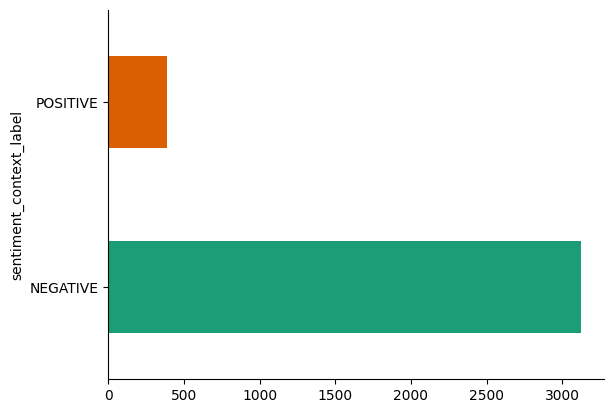

In [18]:
import seaborn as sns

df_sentiment.groupby('sentiment_context_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
df_sentiment['sentiment_context_label'].value_counts()

sentiment_context_label
NEGATIVE    3123
POSITIVE     388
Name: count, dtype: int64

Let's separate our dataset into two sets on the basis of type of sentiment.

In [20]:
mask1 = df_sentiment['sentiment_context_label'] == 'POSITIVE'
mask2 = df_sentiment['sentiment_context_label'] == 'NEGATIVE'

df_positive = df_text[mask1]
df_negative = df_text[mask2]

In [21]:
print(df_positive.shape)
print(df_negative.shape)

(388, 2)
(3123, 2)


In [22]:
df_positive.head()

,Context,Response
80,get place content day day,question fascinating one human ability reflect...
81,get place content day day,one thing come mind making list thing happen d...
82,get place content day day,s important take look inside see s going cause...
94,struggle depression well pretty intense mood s...,s fun ride roller coaster time time nt s also ...
95,struggle depression well pretty intense mood s...,certain high low directly related cycle s poss...


In [23]:
print(df_text['Context'].describe())
print(df_text['Context'].describe().top)

count                                                  3511
unique                                                  831
top       many issue address history sexual abuse ’ brea...
freq                                                     94
Name: Context, dtype: object
many issue address history sexual abuse ’ breast cancer survivor lifetime insomniac long history depression ’ beginning anxiety low self esteem ’ happily married almost 35 year ’ never counseling many issue address counseling


In [24]:
print(df_text['Response'].describe())
print(df_text['Response'].describe().top)

count                                                  3511
unique                                                 2023
top       check latest blog fourwaysaddselfesteemfriends...
freq                                                      4
Name: Response, dtype: object
check latest blog fourwaysaddselfesteemfriendslisti hope offer nugget helpfulness


Let's do some wordcloud visualization

In [25]:

# Combine all text from the 'Context' column into a single string
all_text = ' '.join(df_positive['Context'].tolist())

# Tokenize the text
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Print the most frequent words
word_counts.most_common(50)


[('know', 161),
 ('nt', 160),
 ('m', 147),
 ('feel', 119),
 ('like', 113),
 ('get', 110),
 ('love', 97),
 ('s', 86),
 ('life', 83),
 ('therapist', 82),
 ('relationship', 77),
 ('need', 74),
 ('year', 72),
 ('would', 72),
 ('ve', 71),
 ('’', 70),
 ('thought', 67),
 ('give', 64),
 ('time', 62),
 ('never', 55),
 ('want', 55),
 ('able', 53),
 ('treatment', 53),
 ('feeling', 51),
 ('ca', 51),
 ('right', 50),
 ('ever', 49),
 ('still', 48),
 ('think', 46),
 ('friend', 44),
 ('without', 44),
 ('always', 43),
 ('train', 41),
 ('sometimes', 40),
 ('forever', 37),
 ('work', 37),
 ('family', 36),
 ('thinking', 36),
 ('day', 35),
 ('since', 34),
 ('stop', 34),
 ('past', 34),
 ('move', 34),
 ('first', 34),
 ('one', 33),
 ('wrong', 32),
 ('good', 30),
 ('school', 30),
 ('guy', 30),
 ('mind', 30)]

In [26]:
# Combine all text from the 'Context' column into a single string
all_text = ' '.join(df_negative['Context'].tolist())

# Tokenize the text
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Print the most frequent words
word_counts.most_common(50)


[('nt', 2065),
 ('m', 1487),
 ('’', 1452),
 ('feel', 1212),
 ('like', 1062),
 ('s', 961),
 ('want', 925),
 ('get', 880),
 ('know', 848),
 ('year', 785),
 ('time', 780),
 ('ve', 625),
 ('never', 566),
 ('relationship', 503),
 ('thing', 500),
 ('really', 494),
 ('always', 465),
 ('think', 430),
 ('friend', 416),
 ('people', 406),
 ('issue', 404),
 ('anxiety', 403),
 ('love', 397),
 ('say', 396),
 ('make', 392),
 ('even', 391),
 ('still', 376),
 ('help', 375),
 ('ca', 372),
 ('feeling', 365),
 ('counseling', 357),
 ('told', 334),
 ('day', 332),
 ('going', 328),
 ('go', 324),
 ('life', 321),
 ('boyfriend', 320),
 ('one', 313),
 ('need', 306),
 ('sex', 301),
 ('depression', 295),
 ('lot', 289),
 ('family', 287),
 ('back', 284),
 ('child', 282),
 ('anything', 279),
 ('much', 278),
 ('every', 273),
 ('would', 267),
 ('month', 265)]

Let's remove the most common neutral words that don't add to the sentiment analysis

In [27]:
neutral_words = ["know", "nt", "m", "like", "get", "s","need", "year", "would", "ve", "'","thought", "give", "time", "want","able","ca","ever","still","day","since","one","first","go","going","day","anything","every","month","therapist","treatment","train","feel","think","always","right","thinking","friend","fell","felt","life","stop","counseling","make","many","even","tell","life","see","address","say","almost","told","family"]  # Add more as needed

def remove_neutral_words(text):
    words = text.lower().split()
    filtered_words = [w for w in words if w not in neutral_words]
    return " ".join(filtered_words)

df_negative['Context'] = df_negative['Context'].apply(remove_neutral_words)
df_positive['Context'] = df_positive['Context'].apply(remove_neutral_words)

<ipython-input-27-11bba92abdd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Context'] = df_negative['Context'].apply(remove_neutral_words)
<ipython-input-27-11bba92abdd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Context'] = df_positive['Context'].apply(remove_neutral_words)


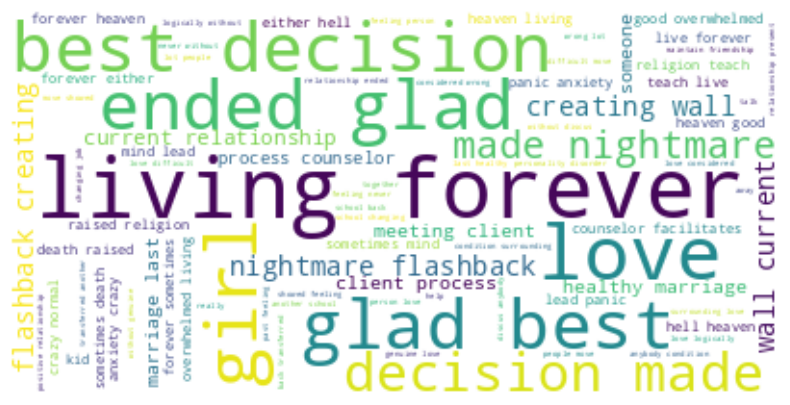

In [28]:

wordcloud = WordCloud(background_color='white', max_words=1000).generate(df_positive['Context'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

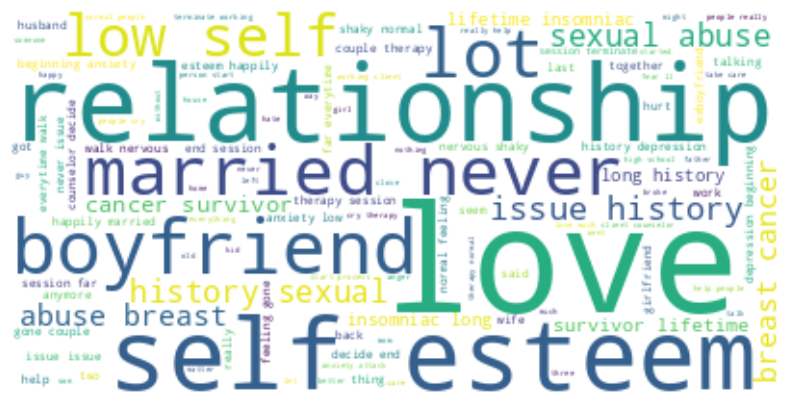

In [29]:
wordcloud = WordCloud(background_color='white', max_words=1000).generate(df_negative['Context'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's try to figure out the kind of sentiment for the Context and Response column using VADER sentiment analyzer

In [30]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_words(text):

  sentiment_words = []
  for word in word_tokenize(text):
    sentiment_score = sia.polarity_scores(word)
    if abs(sentiment_score['compound']) >= 0.5:
      sentiment_words.append(word)
  return sentiment_words


In [31]:
# Apply the function to the 'Context' column
df_text['context_sentiment_words'] = df_text['Context'].apply(get_sentiment_words)

print(df_text[['Context', 'context_sentiment_words']].head())

                                             Context context_sentiment_words
0  m going thing feeling barely sleep nothing thi...               [suicide]
1  m going thing feeling barely sleep nothing thi...               [suicide]
2  m going thing feeling barely sleep nothing thi...               [suicide]
3  m going thing feeling barely sleep nothing thi...               [suicide]
4  m going thing feeling barely sleep nothing thi...               [suicide]


<ipython-input-31-254628a19e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['context_sentiment_words'] = df_text['Context'].apply(get_sentiment_words)


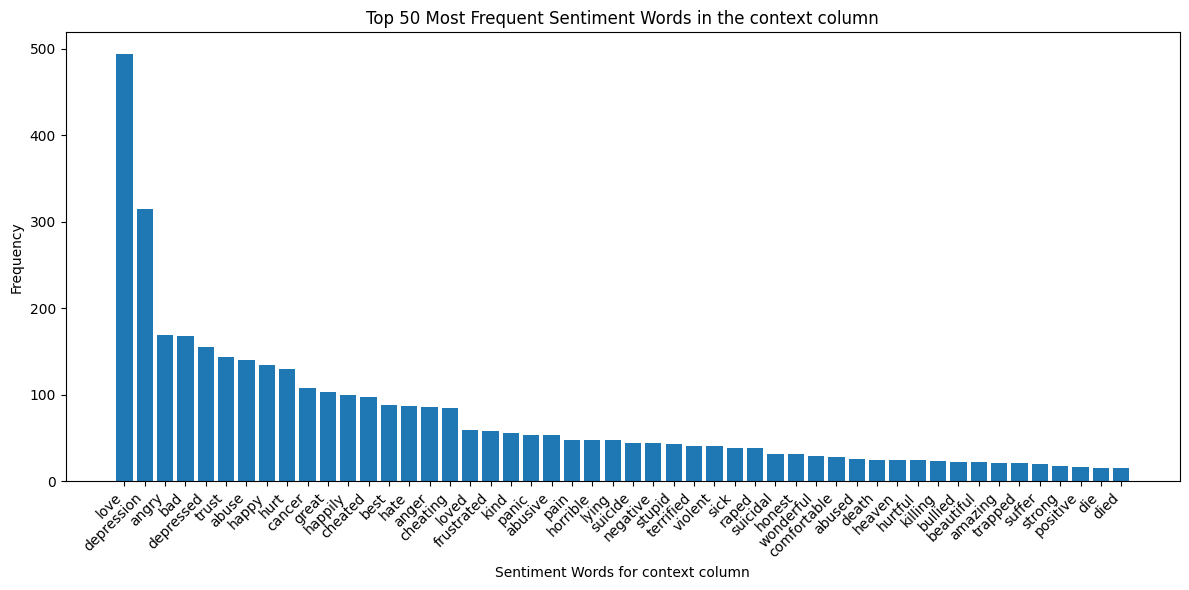

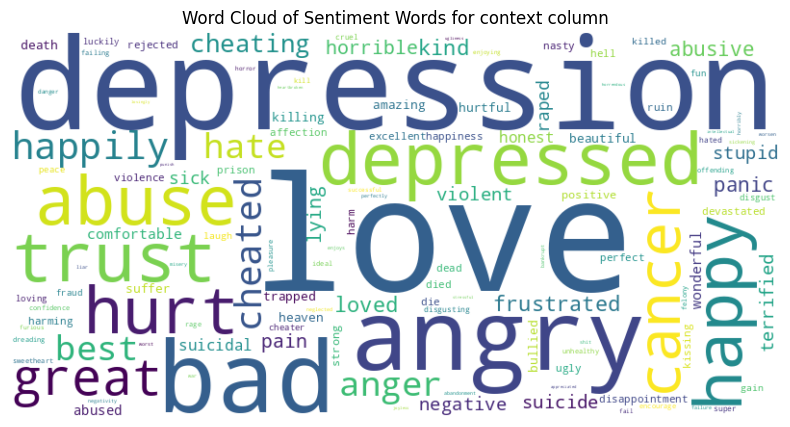

In [32]:
# Flatten the list of sentiment words
sentiment_words_context = [word for sublist in df_text['context_sentiment_words'] for word in sublist]

# Count the frequency of each sentiment word
sentiment_word_counts = Counter(sentiment_words_context)

top_words = sentiment_word_counts.most_common(50)
plt.figure(figsize=(12, 6))
plt.bar([word for word, count in top_words], [count for word, count in top_words])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sentiment Words for context column')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Sentiment Words in the context column')
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sentiment_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sentiment Words for context column')
plt.show()


In [33]:
# Apply the function to the 'Response' column
df_text['response_sentiment_words'] = df_text['Response'].apply(get_sentiment_words)

# Display the results
print(df_text[['Response', 'response_sentiment_words']].head())

                                            Response  \
0  everyone think re worthless maybe need find ne...   
1  first thing d suggest getting sleep need impac...   
2  therapy essential feeling depressed worthless ...   
3  first want let know alone feeling always someo...   
4  heck sure thing hun feeling depression deeplyr...   

                          response_sentiment_words  
0                            [inspirational, harm]  
1                                               []  
2  [depressed, depression, depression, depression]  
3                                               []  
4                                     [depression]  


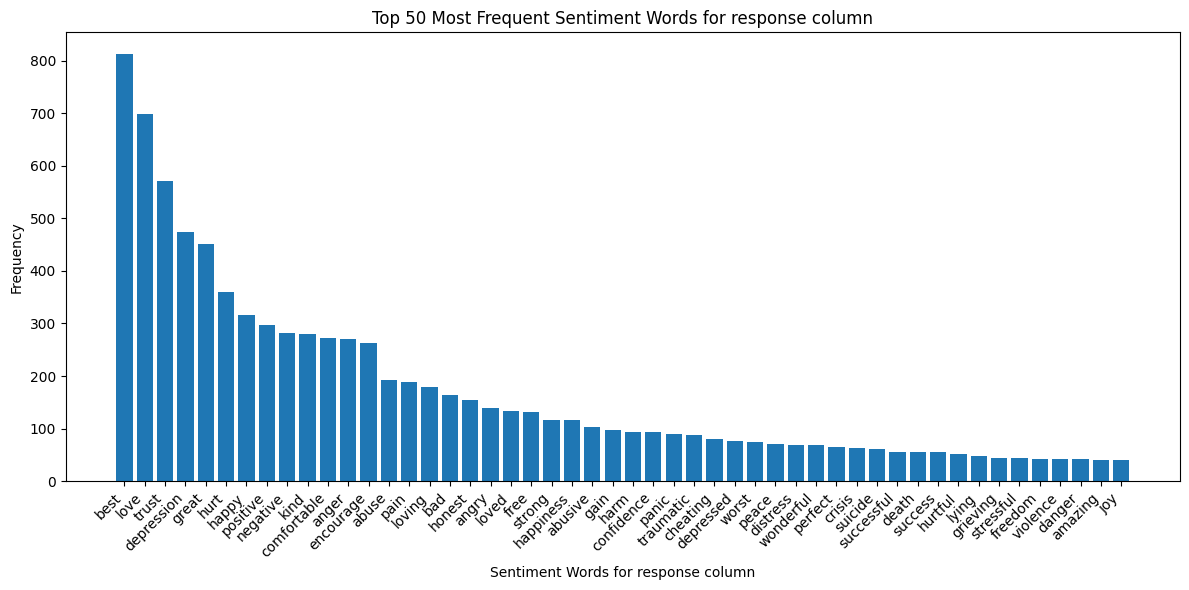

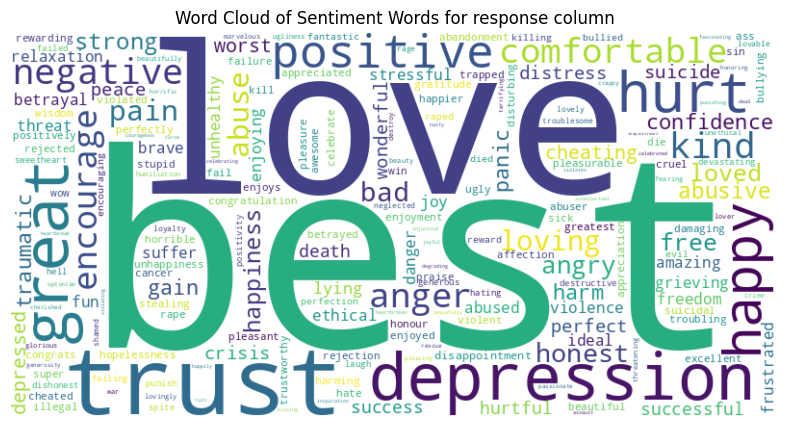

In [34]:
# Flatten the list of sentiment words for response column
sentiment_words_response = [word for sublist in df_text['response_sentiment_words'] for word in sublist]

# Count the frequency of each sentiment word
sentiment_word_counts = Counter(sentiment_words_response)

top_words = sentiment_word_counts.most_common(50)
plt.figure(figsize=(12, 6))
plt.bar([word for word, count in top_words], [count for word, count in top_words])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sentiment Words for response column')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Sentiment Words for response column')
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sentiment_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sentiment Words for response column')
plt.show()

In [36]:
df_text.head(10)

,Context,Response,context_sentiment_words,response_sentiment_words
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...,[suicide],"[inspirational, harm]"
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...,[suicide],[]
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...,[suicide],"[depressed, depression, depression, depression]"
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...,[suicide],[]
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...,[suicide],[depression]
5,m going thing feeling barely sleep nothing thi...,exhibiting specific trait particular temperame...,[suicide],"[joy, love]"
6,m going thing feeling barely sleep nothing thi...,intense depression liar sometimes depression p...,[suicide],"[depression, liar, depression, depression, dep..."
7,m going thing feeling barely sleep nothing thi...,sound like may putting last wrote want fix iss...,[suicide],[hurtful]
8,m going thing feeling barely sleep nothing thi...,must really difficult experience going right t...,[suicide],"[depression, depression, depression, best]"
9,m going thing feeling barely sleep nothing thi...,people feel worthless one way another told wor...,[suicide],[]
